# NWA suntans: play with snapshot

see [description](https://github.com/TIDE-ITRH/tide-suntans-nws) and relevant paper: [Rayson et al. 2021](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2021JC017570)

Need: depth, cell manipulations


In [1]:
import os

import numpy as np
#import pandas as pd
import xarray as xr

%matplotlib inline
from matplotlib import pyplot as plt

import pynsitu as pin
crs = pin.maps.crs

import nwatools as nwa

ERROR 1: PROJ: proj_create_from_database: Open of /home1/datahome/aponte/.miniconda3/envs/equinox/share/proj failed


In [2]:
from dask.distributed import Client, LocalCluster
#
cluster = LocalCluster()
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 56,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:47060,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 56
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:39462,Total threads: 7
Dashboard: http://127.0.0.1:43595/status,Memory: 12.50 GiB
Nanny: tcp://127.0.0.1:49266,


---
## load data

In [3]:
ds, grd = nwa.load_surf()

# temporal zoom
ds = ds.isel(time=slice(0,5)).persist()

---

## plotting

In [4]:
da = ds.eta.isel(time=1).persist()

In [5]:
_, _, poly, cbar = grd.suntans.plotcelldata(da, cmap='RdBu')

Changing the _FillValue from -999999 to 999999


/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


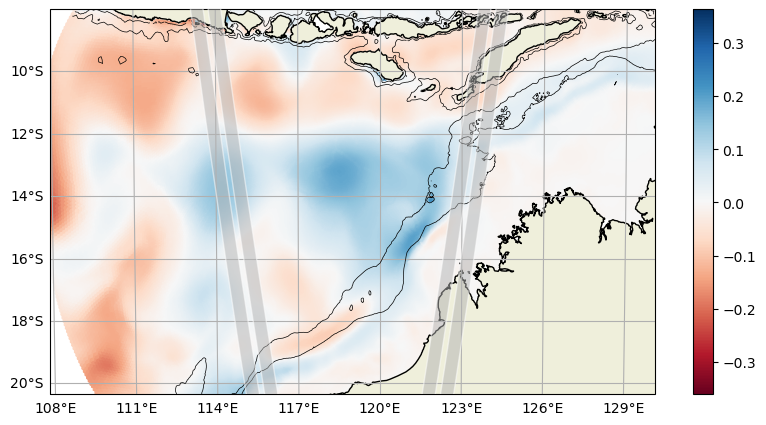

In [6]:
fig, ax = nwa.map_init("large", bathy=(grd, ds))
_, _, poly, cbar = grd.suntans.plotcelldata(da, cmap='RdBu', crs=crs)

Changing the _FillValue from -999999 to 999999


/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


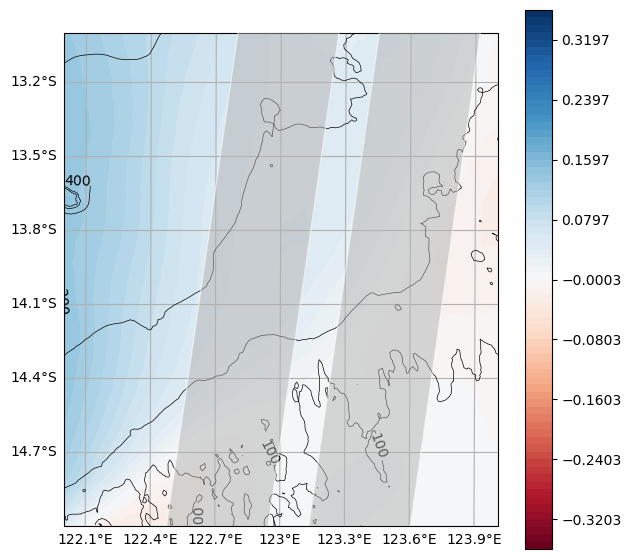

In [5]:
zoom= "cp"

fig, ax = nwa.map_init(zoom, bathy=(grd, ds))

#_, _, poly, cbar = grd.suntans.plotcelldata(da, cmap='RdBu', transform=crs)

vmin, vmax = float(da.min()), float(da.max())
#lvls = np.arange(-1,1,.1)
lvls = np.arange(vmin,vmax,.01)
_, _, tri, cbar = grd.suntans.contourf(da, clevs=lvls, cmap="RdBu", transform=crs)

---

## temperature & vorticity

In [19]:
start, end = "2013/09/02 00:00", "2013/09/04 00:00"
di = 6

start, end, di = None, None, 24*30

zoom = "cp_large"

In [20]:
ds, grd = nwa.load_surf()
f = pin.geo.coriolis(ds.yv)

if start is not None and end is not None:
    ds = ds.sel(time=slice(start, end))
ds = ds.isel(time=slice(0, None, di))

# add deformations
zarr = os.path.join(nwa.suntans_dir, f"suntans_2km_surf_gradients")
dsd = xr.open_zarr(zarr)

if start is not None and end is not None:
    dsd = dsd.sel(time=slice(start, end))
dsd = dsd.isel(time=slice(0, None, di))

ds["vorticity"] = (dsd["dvcdx"] - dsd["ducdy"])/f
ds["divergence"] = (dsd["ducdx"] + dsd["dvcdy"])/f
ds["grad_temp"] = np.sqrt(dsd["dtempdx"]**2 + dsd["dtempdy"]**2)

#dsd["strain_normal"] = dsd["ducdx"] - dsd["dvcdy"]
#dsd["strain_shear"] = dsd["dvcdx"] + dsd["ducdy"]

In [21]:
ds = ds.persist()

In [6]:
_ds = ds.isel(time=4)

Changing the _FillValue from -999999 to 999999


/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


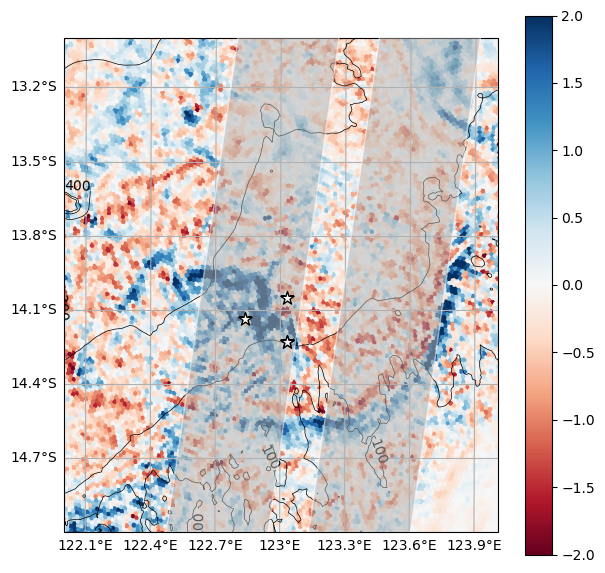

In [9]:
fig, ax = nwa.map_init(zoom, bathy=(grd, ds))
nwa.plot_moorings(ax)
_, _, poly, cbar = grd.suntans.plotcelldata(_ds.vorticity, vmin=-2., vmax=2., cmap='RdBu', crs=crs)

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


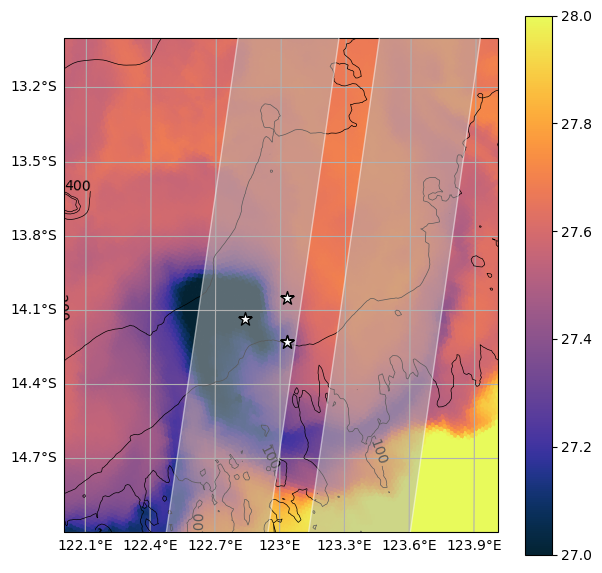

In [10]:
fig, ax = nwa.map_init(zoom, bathy=(grd, ds))
nwa.plot_moorings(ax)
_, _, poly, cbar = grd.suntans.plotcelldata(_ds.temp, vmin=27, vmax=28, cmap=pin.thermal, crs=crs)

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


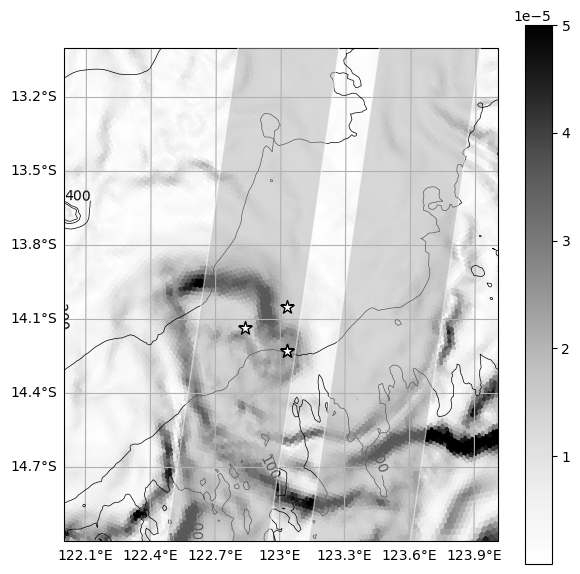

In [11]:
fig, ax = nwa.map_init(zoom, bathy=(grd, ds))
nwa.plot_moorings(ax)
_, _, poly, cbar = grd.suntans.plotcelldata(_ds.grad_temp, vmax=5e-5, cmap="Greys", crs=crs)

In [12]:
_ds = nwa.zoom(ds, nwa.area_cp_large).compute()

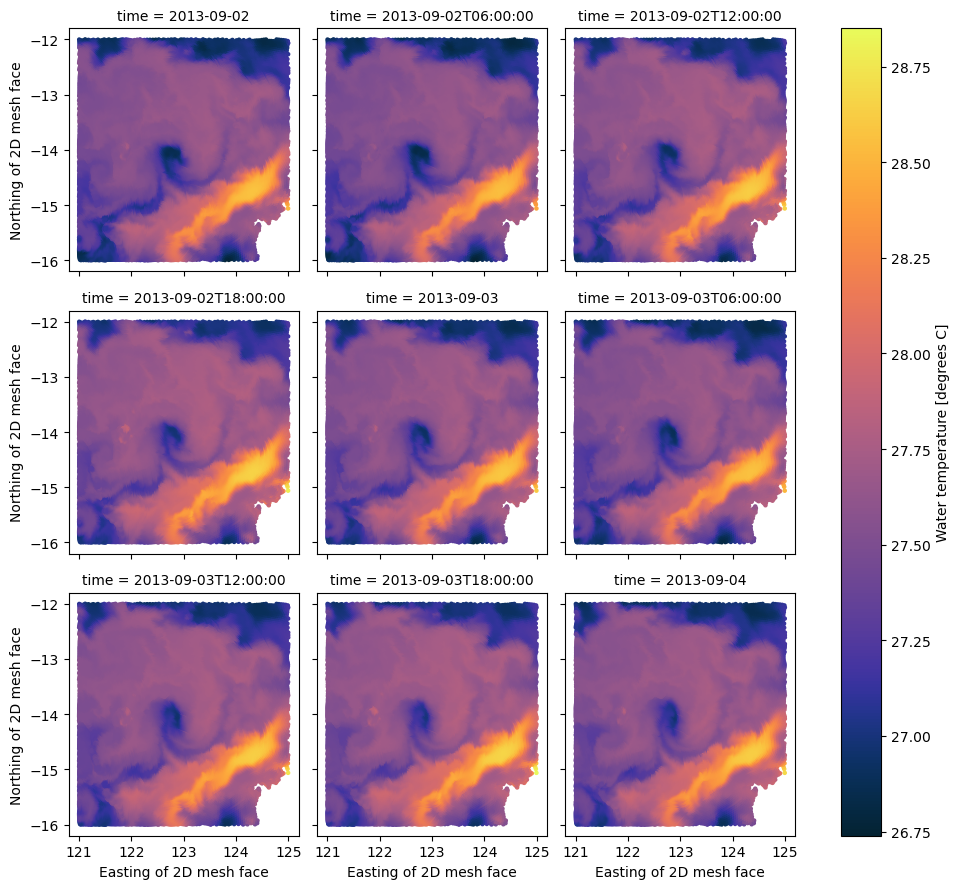

In [15]:
xr.plot.scatter(_ds, "xv", "yv", s=5, hue="temp", vmin=27, vmax=28, col="time", col_wrap=3, cmap=pin.thermal)

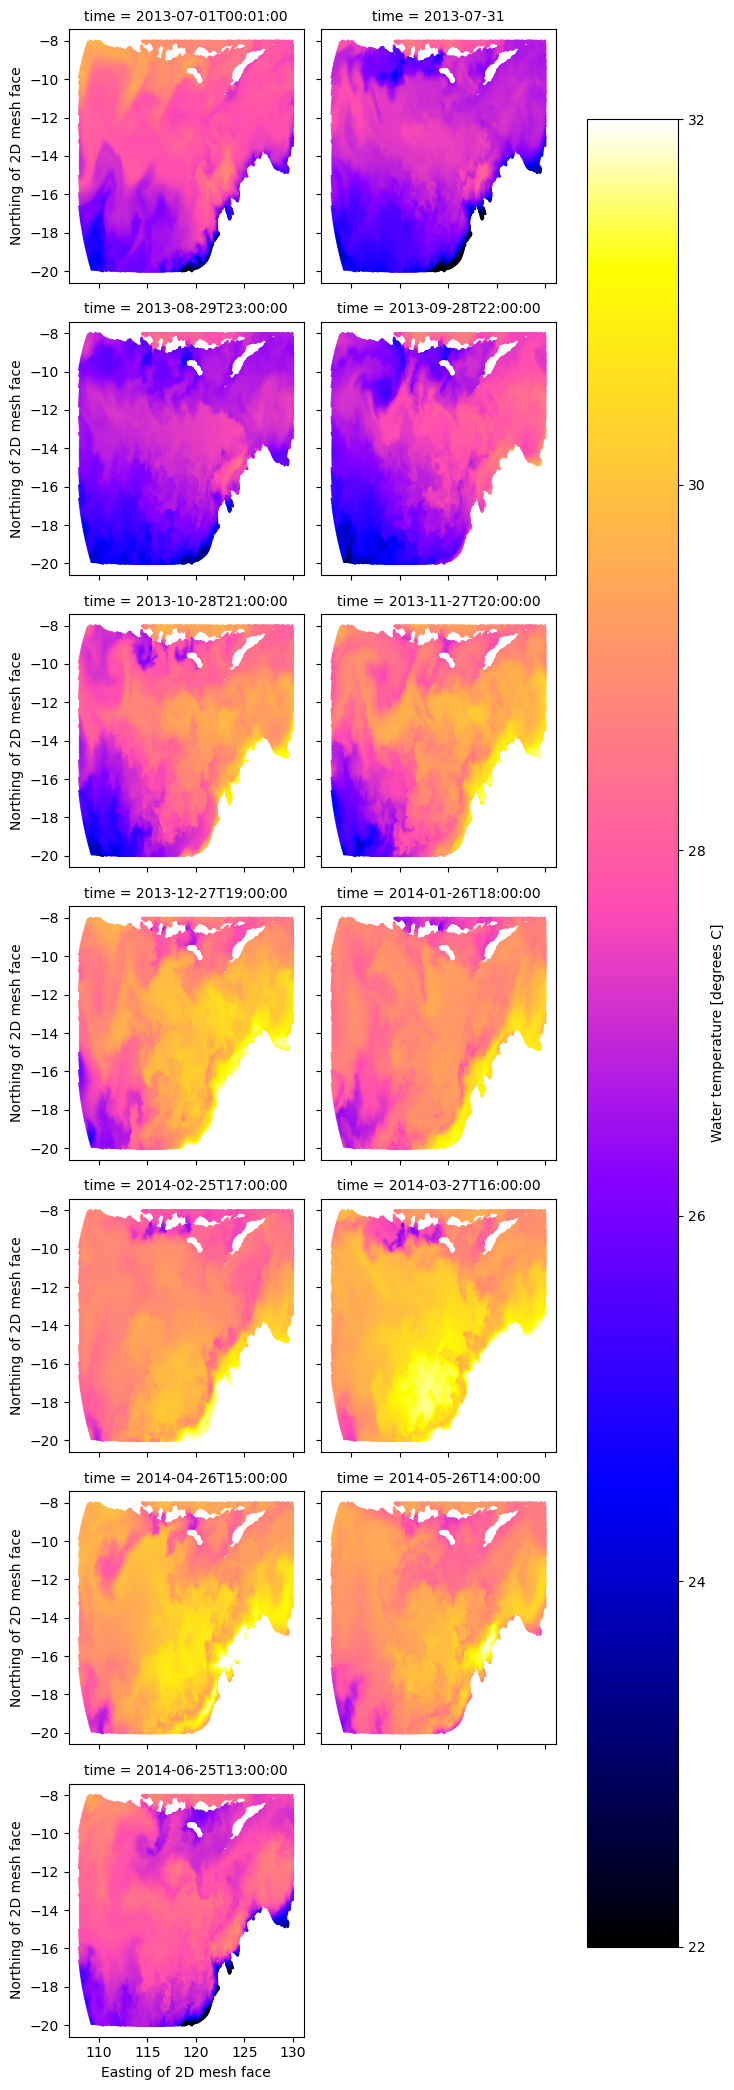

In [25]:
_ds = nwa.zoom(ds, nwa.area_large).compute()
xr.plot.scatter(_ds, "xv", "yv", s=1,
                vmin=22, vmax=32,
                hue="temp", cmap="gnuplot2", # pin.thermal
                col="time", col_wrap=2)
#vmin=27, vmax=28, 


---

In [41]:
cluster.close()